# Lesson 06 Assignment

In this assignment, we want to read the `retail-churn.csv` dataset that we examined in a previous assignment and begin to pre-process it. The goal of the assignment is to become familiar with some common pre-processing and feature engineering steps by implementing them.

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://rspm.socob.mil/pypi/latest/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://rspm.socob.mil/pypi/latest/simple
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

col_names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar']
churn = pd.read_csv("retail-churn.csv", sep = ",", skiprows = 1, names = col_names)

### Some basic EDA
present the first few rows and use pandas' `describe` to get an overview of the data
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[0 point]</span>

In [4]:
# Present the first few rows
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


In [5]:
# Use pandas' describe to get an overview of the data
churn.describe()
#print(churn.describe())

,user_id,store_id,trans_id,item_id,quantity,dollar
count,2.522040e+05,252204.000000,2.522040e+05,2.522040e+05,252204.000000,252204.000000
mean,1.395660e+06,126101.500000,1.229771e+06,4.467833e+12,1.385692,130.911389
std,6.094769e+05,72805.167983,2.350992e+05,1.679512e+12,3.705732,388.142169
min,1.113000e+03,0.000000,8.177470e+05,2.000882e+07,1.000000,1.000000
25%,9.937150e+05,63050.750000,1.025926e+06,4.710000e+12,1.000000,42.000000
50%,1.586046e+06,126101.500000,1.233476e+06,4.710000e+12,1.000000,76.000000
75%,1.862232e+06,189152.250000,1.433222e+06,4.710000e+12,1.000000,132.000000
max,2.179605e+06,252203.000000,1.635482e+06,9.790000e+12,1200.000000,70589.000000


In [6]:
# Present a random selection of 10 rows
churn.sample(1000).head(10)

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
217088,2143408,E,E,149698,1480487,2/12/2001 0:00,4.710000e+12,1,62
181133,1535105,E,C,239699,1408426,1/26/2001 0:00,5.000030e+10,1,59
241607,1634594,D,D,250467,1594418,2/24/2001 0:00,4.720000e+12,1,35
240258,558679,F,E,250512,1595004,2/24/2001 0:00,4.710000e+12,2,98
127436,1191141,C,E,7983,1286884,1/4/2001 0:00,4.710000e+12,2,530
55976,371261,G,E,105560,1003237,11/26/2000 0:00,4.720000e+12,2,98
215519,2141091,C,F,23427,1437951,2/11/2001 0:00,4.710000e+12,1,31
207991,1812008,F,F,209439,1462534,2/9/2001 0:00,4.710000e+12,3,30
230694,942607,E,F,136391,1564647,2/19/2001 0:00,4.710000e+12,1,95
210766,1867992,C,E,243801,1455125,2/10/2001 0:00,3.700044e+10,1,36


In [7]:
# Show the number of null or missing values by column
print(churn.isnull().sum())

user_id      0
gender       0
address      0
store_id     0
trans_id     0
timestamp    0
item_id      0
quantity     0
dollar       0
dtype: int64


The new data frame will be called `churn_processed`, which stores the pre-processed columns as you run through each of the these steps. You will need to make sure your columns are properly named.

1. Cast the `timestamp` column in churn into a column of type `datetime` and put the column into the `churn_processed` dataframe.  The new column should also be named `timestamp`.  Extract two new columns from `timestamp`: `dow` is the day of the week and `month` is the month of the year. Then drop the `timestamp` column from `churn_processed`.  Present the first few rows of `churn_processed`.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[2 point]</span>

In [8]:
from datetime import datetime as dt

# Create the new (empty) data frame, called churn_processed
churn_processed = pd.DataFrame()

# Cast timestamp to datetime
churn['timestamp'] = churn['timestamp'].astype('datetime64[ns]')

# Add timestamp to new dataframe (churn_processed)
churn_processed = churn_processed.assign(timestamp=churn['timestamp'])

# Create a dow column
churn_processed['dow'] = churn['timestamp'].dt.strftime('%A')
# churn_processed['dow'] = churn['timestamp'].dt.dayofweek

# Create a month column
churn_processed['month'] = churn['timestamp'].dt.strftime('%b')
#churn_processed['month'] = churn['timestamp'].dt.month

# Drop Timestamp
churn_processed = churn_processed.drop('timestamp', axis=1)

# Present the first few rows of churn_processed
churn_processed.head()

,dow,month
0,Wednesday,Nov
1,Wednesday,Nov
2,Wednesday,Nov
3,Wednesday,Nov
4,Wednesday,Nov


In [9]:
churn_processed.dow.unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [10]:
churn_processed.month.unique()

array(['Nov', 'Dec', 'Jan', 'Feb'], dtype=object)

In [11]:
# display column data types and summary of the dataframe
print(churn_processed.dtypes)

dow      object
month    object
dtype: object


Reason: To cast the timestamp column in churn into a column of type datetime and put the column into the churn_processed dataframe. Then name the new column timestamp. Extract the two new columns from timestamp: dow as the day of the week and month as the month of the year. Then I drop the timestamp column from churn_processed. Presenting the first few rows of churn_processed.

Conclusion: To adjust the timestamp column as a more operational data type (datetime). Move that timestamp column into a new dataframe for analysis. Extract two new columns from timestamp for analysis on day of the week and month of the year. Drop timestamp once we get our two desired columns because he no longer need it for analysis nor want it to inhibit our future analysis. First few rows displayed to show data adjustment is correct.

2. Add `address` from `churn` to `churn_processed`. One-hot encode `address`, `dow` and `month`. Then drop columns `address`, `dow`, and `month` from `churn_processed`.  Finally, show some of the dataframe.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[2 point]</span>  

In [12]:
from sklearn.preprocessing import OneHotEncoder
# One hot encoder is used to convert categorical data into numerical data

In [13]:
# Add address column
churn_processed = churn_processed.assign(address=churn['address'])

# One-hot-encode address, dow and month
one_hot = OneHotEncoder(sparse=False)

# Fit the one-hot encoder
one_hot.fit(churn_processed)
# At this point all columns (dow, month, & address) are one hot encoded

# Create Column Names
col_names = one_hot.get_feature_names_out(churn_processed.columns)
col_names

c_p_ohe_df = pd.DataFrame(one_hot.transform(churn_processed), columns=col_names)
c_p_ohe_df.head()

# Add one-hot endcoded values to new columns
churn_processed = churn_processed.join(c_p_ohe_df)

# Drop address, dow and month
churn_processed = churn_processed.drop(columns=['dow', 'month', 'address'])

# Show some of the dataframe
# churn_processed.address.unique()
churn_processed.head()

/home/aaron.p.comins.ctr/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday,month_Dec,month_Feb,month_Jan,month_Nov,address_A,address_B,address_C,address_D,address_E,address_F,address_G,address_H
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Reason: To add address from churn to churn_processed and subsequently one-hot encode address, dow and month. Then drop columns address, dow, and month from churn_processed. Lastly we show some of the dataframe.

Conclusion: Added address from churn to churn_processed to one hot encode it. One hot encoded address, dow, and month for future analysis and dropped address, dow, and month from churn_processed so it does not affect future analysis. Finally, showed some of the dataframe to ensure we did the work correctly.

3. So far we dropped `address`, `dow`, `month`, and `timestamp`.  Why would we want to drop all these columns?
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[1 point]</span> 

**Why would we want to drop all these columns?**<br/>

First, we want columns address, dow, month, and timestamp in the dataframe so we can one hot encode them. Then once we add the one hot encoded columns, we want to drop said columns to isolate the new one hot encoded columns for further analysis which can then feed it into a machine learning algorithm. Given that these columns are not independent of the one hot-encoded columns, including them can potentially create issues associated with multicollinearity, and may subsequently confuse the results for the model.


4. Rescale `dollar` using min-max normalization. Use `pandas` and `numpy` to do it and call the rescaled column `dollar_std_minmax`.  Then see what the first few rows of the dataframe looks like.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[1 point]</span> 

In [14]:
# How many different dollar amounts are in churn?
len(churn.dollar.unique())

1602

In [15]:
from sklearn.preprocessing import minmax_scale

In [16]:
# This is another way to use minmax
# Min-max normalize the 'dollar' column
churn['dollar_std_minmax'] = minmax_scale(churn['dollar'])

churn.describe()

,user_id,store_id,trans_id,timestamp,item_id,quantity,dollar,dollar_std_minmax
count,2.522040e+05,252204.000000,2.522040e+05,252204,2.522040e+05,252204.000000,252204.000000,252204.000000
mean,1.395660e+06,126101.500000,1.229771e+06,2000-12-31 04:58:59.192082560,4.467833e+12,1.385692,130.911389,0.001840
min,1.113000e+03,0.000000,8.177470e+05,2000-11-01 00:00:00,2.000882e+07,1.000000,1.000000,0.000000
25%,9.937150e+05,63050.750000,1.025926e+06,2000-11-28 00:00:00,4.710000e+12,1.000000,42.000000,0.000581
50%,1.586046e+06,126101.500000,1.233476e+06,2001-01-02 00:00:00,4.710000e+12,1.000000,76.000000,0.001063
75%,1.862232e+06,189152.250000,1.433222e+06,2001-01-31 00:00:00,4.710000e+12,1.000000,132.000000,0.001856
max,2.179605e+06,252203.000000,1.635482e+06,2001-02-28 00:00:00,9.790000e+12,1200.000000,70589.000000,1.000000
std,6.094769e+05,72805.167983,2.350992e+05,NaN,1.679512e+12,3.705732,388.142169,0.005499


In [17]:
# Displaying the first few rows of the dataframe
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar,dollar_std_minmax
0,101981,F,E,2860,818463,2000-11-01,4.710000e+12,1,37,0.000510
1,101981,F,E,2861,818464,2000-11-01,4.710000e+12,1,17,0.000227
2,101981,F,E,2862,818465,2000-11-01,4.710000e+12,1,23,0.000312
3,101981,F,E,2863,818466,2000-11-01,4.710000e+12,1,41,0.000567
4,101981,F,E,2864,818467,2000-11-01,4.710000e+12,8,288,0.004066


Reason: To rescale dollar using min-max normalization andcall the rescaled column dollar_std_minmax. Then see what the first few rows of the dataframe looks like.

Conclusion: Rescaled dollar using min-max normalization naming it dollar_std_minmax verifying all data falls within 0 (mean) and 1 (std). Describe and first few rows displayed for for accuracy of work.

You can read about **robust normalization** [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html). The word **robust** in statistics generally refers to methods that behave reasonably even if the data is unusual.  For example, you can say that the median is a *robust* measure for the "average" of the data, while the mean is not.  In this respect a normalization is similar to an average. For a normalization **robust** might mean that the method is not affected by outliers. 
<br/><br/>
5. Write briefly about what makes robust normalization different from Z-normalization.  Write briefly about what makes robust normalization more robust than Z-normalization.  Rescale `quantity` using robust normalization. Call the rescaled column `qty_std_robust` and add it to `churn_processed`.  Compare minimum, maximum, mean, standard deviation, and the median of the original churn['quantity'] with the robust-normalized churn_processed['qty_std_robust'].  Comment on what went wrong.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[3 point]</span>

**Robust normalization vs. Z-normalization**<br/>

Robust normalization is a data normalization technique that is not affected by outliers and improve machine learning algorithm performance. It helps make data sets easily comparable. The negative aspects of robust normalization is that you can lose some information from the original dataset and it can be more computationally expensive in comparison to other normalization techniques.

Z-normalization is also a data normalization technique that changes the dataset values so that they have a mean of 0 and the standard deviation of 1. Again, this helps make data sets easily comparable. The negative aspect of this technique are similar to that of robust normalization (loss of information from the original dataset and computationally expensive comparative to other techniques).

Robust normalization does not make any assumptions towards the distribution of data (a non-parametric normalization) which makes it a good choice for data that is not normally distributed or data that may have outliers. Z-normalization in turn makes assumptions towards the distribution of data (a parametric technique). It (Z-norm) assumes the data is normally distributed. Additionally, robust normalization is less sensitive to outliers (compared to Z-norm) due to the fact that it uses the median and IQR to calculate the mean and standard deviation whereas Z-normalization uses the mean and standard deviation on the dataset entirely. 

Key takeaway, robust normalization is best for not normally distributed datasets or datasets with outliers. Z-normalization is best for normally distributed datasets and no outliers. 

**Robust normalization is more robust than Z-normalization**<br/>

Robust normalization is more robust than Z-normalization because it is not affected by outliers. As stated above, robust normalization uses the median and IQR which minimizes the potential impact of outliers. Z-normalization uses the mean and standard deviation which can make it more sensitive to outliers subsequently making it less robust than robust normalization.

In [18]:
from sklearn.preprocessing import RobustScaler

In [19]:
# Display describe function prior to modifying data
churn.quantity.describe()

count    252204.000000
mean          1.385692
std           3.705732
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        1200.000000
Name: quantity, dtype: float64

In [20]:
# # Robust normalize the 'quantity' column
scaler = RobustScaler()
churn_processed['qty_std_robust'] = scaler.fit_transform(churn['quantity'].values.reshape(-1, 1))

In [21]:
# Show counts of qty_std_robust
churn_processed.qty_std_robust.value_counts()

qty_std_robust
0.0      197394
1.0       39835
2.0        7023
3.0        3586
5.0        2013
          ...  
95.0          1
719.0         1
851.0         1
28.0          1
33.0          1
Name: count, Length: 62, dtype: int64

In [22]:
churn_processed.head()

,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday,month_Dec,month_Feb,month_Jan,month_Nov,address_A,address_B,address_C,address_D,address_E,address_F,address_G,address_H,qty_std_robust
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0


In [23]:
churn_processed.describe()

,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday,month_Dec,month_Feb,month_Jan,month_Nov,address_A,address_B,address_C,address_D,address_E,address_F,address_G,address_H,qty_std_robust
count,252204.000000,252204.000000,252204.000000,252204.000000,252204.000000,252204.000000,252204.000000,252204.000000,252204.00000,252204.000000,252204.000000,252204.000000,252204.000000,252204.000000,252204.000000,252204.000000,252204.000000,252204.000000,252204.000000,252204.000000
mean,0.109265,0.129855,0.188129,0.249029,0.108821,0.109808,0.105093,0.214212,0.24573,0.272232,0.267827,0.023410,0.021019,0.085998,0.047878,0.379613,0.300039,0.094431,0.047612,0.385692
std,0.311972,0.336145,0.390816,0.432451,0.311415,0.312651,0.306674,0.410275,0.43052,0.445110,0.442828,0.151201,0.143447,0.280361,0.213508,0.485292,0.458275,0.292429,0.212945,3.705732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1199.000000


In [24]:
# Compare minimum, maximum, mean, standard deviation, and the median of churn['quantity'] with churn_processed['qty_std_robust']
Compare = []

Compare.append(['Original', np.min(churn['quantity']), np.max(churn['quantity']), np.mean(churn['quantity']), np.std(churn['quantity']), np.median(churn['quantity'])])
Compare.append(['Robust', np.min(churn_processed['qty_std_robust']), np.max(churn_processed['qty_std_robust']), np.mean(churn_processed['qty_std_robust']), np.std(churn_processed['qty_std_robust']), np.median(churn_processed['qty_std_robust'])])
Distributions = pd.DataFrame(data=Compare, columns=['Normalization', 'Min', 'Max', 'Mean', 'Std', 'Median']).round(decimals=2)
print(" Distributions before Normalizations:")
display(Distributions.head(1))
print(" Distributions after Normalizations")
display(Distributions.loc[1:6,:])

 Distributions before Normalizations:


,Normalization,Min,Max,Mean,Std,Median
0,Original,1.0,1200.0,1.39,3.71,1.0


 Distributions after Normalizations


,Normalization,Min,Max,Mean,Std,Median
1,Robust,0.0,1199.0,0.39,3.71,0.0


Reason: To write briefly about what makes robust normalization different from Z-normalization (shown above). Then, write briefly about what makes robust normalization more robust than Z-normalization (shown above). 

Code: Rescale quantity using robust normalization and call the rescaled column qty_std_robust adding it to churn_processed. Compare minimum, maximum, mean, standard deviation, and the median of the original churn['quantity'] with the robust-normalized churn_processed['qty_std_robust']. Comment on what went wrong.

Conclusion: Rescalced quanitty using robust normalization and named the robust normalized column qty_std_robust. Then compared the data before and after normalization. Ultimately got an error but worked through it. Comment on what went wrong below:

**Failure of Robust Normalization**<br/>

***Answer***:<br/>
There was a divide by zero error.
The problem with the robust normalization is that it does not take into account the original scale of the data meaning the robust-normalized data cannot be used to compare the relative sizes of the values in the original dataset. IE, if the original data has a min value of 0 and a max value of 100, then the robust-normalized data will also have a min value of 0 and a max value of 100. However, the robust-normalized data will not be able to tell you whether a value of 50 is closer to 0 or 100. This is because the robust-normalized data has all been scaled to have a mean of 0 and a standard deviation of 1.


6. Rescale `quantity` using Z-normalization, but normalize `quantity` **per user**, i.e. group by `user_id` so that the mean and standard deviation computed to normalize are computed separately by each `user_id`. Call the rescaled feature `qty_std_Z_byuser`. Present a histogram of `qty_std_Z_byuser`.  Briefly describe why and when you think this kind of normalization makes sense.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[3 point]</span>

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
# Z-normalize quantity per user_id
# Define a function to apply the z norm to an array
def z_norm(offset, scale, arr):
    return np.array([(x-offset)/scale for x in arr])

# Create mean and std 
mod_mean = np.mean(churn['quantity'])
mod_std = np.std(churn['quantity'])
# Create a df of aggregated user id's and their means
churn2 = pd.DataFrame(churn.groupby('user_id').quantity.mean())

# apply the function to the quantity column
churn2['qty_std_Z_byuser'] = z_norm(mod_mean, mod_std, churn2['quantity'])
# merge the dataframes with forward fill (one-to-many on user_id)
churn_processed = pd.merge_ordered(churn, churn2['qty_std_Z_byuser'], on = 'user_id', fill_method = 'ffill')
# See what the dataframe looks like
churn_processed

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar,dollar_std_minmax,qty_std_Z_byuser
0,1113,K,F,118152,904890,2000-11-12,4.710000e+12,2,29,0.000397,-0.029121
1,1113,K,F,118153,905431,2000-11-12,4.900000e+12,3,391,0.005525,-0.029121
2,1113,K,F,118154,1000113,2000-11-26,4.900000e+12,1,111,0.001558,-0.029121
3,1113,K,F,118155,1000416,2000-11-26,7.620000e+12,1,268,0.003783,-0.029121
4,1113,K,F,118156,1000417,2000-11-26,4.710000e+12,1,179,0.002522,-0.029121
...,...,...,...,...,...,...,...,...,...,...,...
252199,2179605,B,G,251838,1630692,2001-02-28,2.250000e+12,2,138,0.001941,-0.010669
252200,2179605,B,G,251839,1630821,2001-02-28,4.710000e+12,1,96,0.001346,-0.010669
252201,2179605,B,G,251840,1630931,2001-02-28,4.710000e+12,1,89,0.001247,-0.010669
252202,2179605,B,G,251841,1631033,2001-02-28,4.710000e+12,1,108,0.001516,-0.010669


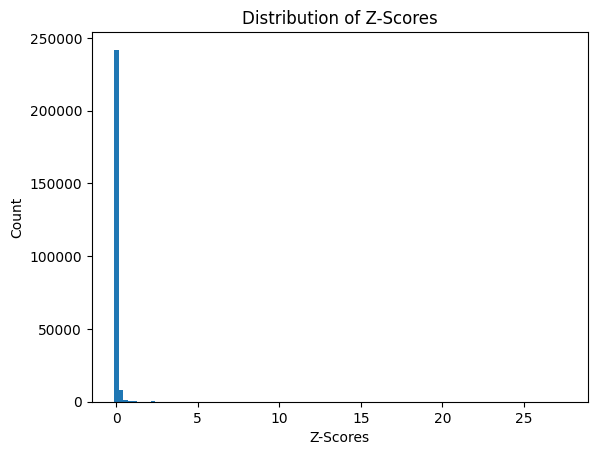

In [27]:
# Present histogram of qty_std_Z_byuser
plt.hist(churn_processed['qty_std_Z_byuser'], bins = 100)
plt.xlabel('Z-Scores')
plt.ylabel('Count')
plt.title('Distribution of Z-Scores')
plt.show()

In [28]:
# Display a summary of the new data
churn_processed.describe()

,user_id,store_id,trans_id,timestamp,item_id,quantity,dollar,dollar_std_minmax,qty_std_Z_byuser
count,2.522040e+05,252204.000000,2.522040e+05,252204,2.522040e+05,252204.000000,252204.000000,252204.000000,2.522040e+05
mean,1.395660e+06,126101.500000,1.229771e+06,2000-12-31 04:58:59.192082560,4.467833e+12,1.385692,130.911389,0.001840,-3.606187e-18
min,1.113000e+03,0.000000,8.177470e+05,2000-11-01 00:00:00,2.000882e+07,1.000000,1.000000,0.000000,-1.040800e-01
25%,9.937150e+05,63050.750000,1.025926e+06,2000-11-28 00:00:00,4.710000e+12,1.000000,42.000000,0.000581,-5.910451e-02
50%,1.586046e+06,126101.500000,1.233476e+06,2001-01-02 00:00:00,4.710000e+12,1.000000,76.000000,0.001063,-2.741234e-02
75%,1.862232e+06,189152.250000,1.433222e+06,2001-01-31 00:00:00,4.710000e+12,1.000000,132.000000,0.001856,1.702467e-02
max,2.179605e+06,252203.000000,1.635482e+06,2001-02-28 00:00:00,9.790000e+12,1200.000000,70589.000000,1.000000,2.753334e+01
std,6.094769e+05,72805.167983,2.350992e+05,NaN,1.679512e+12,3.705732,388.142169,0.005499,2.576438e-01


Reason: To rescale quantity using Z-normalization, but normalize quantity per user. Then call the rescaled feature qty_std_Z_byuser. Present a histogram of qty_std_Z_byuser. Briefly describing why and when I think this kind of normalization makes sense.

Conclusion: Rescaled quantity using Z-norm by way of normalizing quantity per user. Calling the rescaled feature qty_std_Z_byuser for further analysis of the columns. Histogram displays the outcome of qty_sty_Z_byuser. Describign why/when I think this kind of normalization makes sense below.

**What could be the purpose of this normalization?**
<br/>

Using z-normalization may create a positive outcome in the outliers through model effect. Robust normalization scores are clustered rather closely since they eliminate the effect of the outlier on the statistic. While this may be desireable sometimes, it may also inhibit the ability to connect effect sizes to parameter values. 

7. Convert `item_id` into a category column in `churn_processed`.  Replace the `item_id` of all the items sold only once in the entire data with `"999999"`.  How many item ids are of category `"999999"`?  Display 10 rows of `churn_processed` where `item_id` is category `"999999"`.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[2 point]</span>

In [29]:
# Convert item_id into a category column in churn_processed

churn_processed['item_id'] = churn['item_id'].astype('category')

In [30]:
#  Replace the item_id of all the items sold only once in the entire data with "999999"   
item_id_counts = churn['item_id'].value_counts()
only_sold_once = item_id_counts[item_id_counts == 1].index
churn_processed['item_id'].replace(only_sold_once, '999999', inplace=True)

# How many item ids are of category "999999"
print(f'There are {churn_processed["item_id"].value_counts()["999999"]} records with a category of "999999"')
print("----------------------------------------------------")
# Display 10 rows of churn_processed where item_id is category 999999
churn_processed.query("item_id == '999999'").head(10)

There are 876 records with a category of "999999"
----------------------------------------------------


,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar,dollar_std_minmax,qty_std_Z_byuser
847,20459,E,D,16135,862987,2000-11-06,999999,1,129,0.001813,-0.027412
1415,20459,E,D,16703,1316244,2001-01-17,999999,2,198,0.002791,-0.027412
1452,20459,E,D,16740,1334414,2001-01-19,999999,2,478,0.006758,-0.027412
1457,20459,E,D,16745,1334421,2001-01-19,999999,1,118,0.001658,-0.027412
1458,20459,E,D,16746,1334423,2001-01-19,999999,2,174,0.002451,-0.027412
2201,23771,J,E,192242,1257673,2001-01-11,999999,1,58,0.000808,-0.067282
2388,25577,B,E,77272,862561,2000-11-06,999999,1,49,0.000680,0.001515
2468,25683,E,F,33930,1313207,2001-01-17,999999,1,48,0.000666,-0.024857
3045,28516,C,E,145115,1179818,2000-12-25,999999,1,85,0.001190,-0.094085
3871,46633,C,E,119556,1111171,2000-12-03,999999,1,48,0.000666,0.004667


Reason: To convert item_id into a category column in churn_processed and then replace the item_id of all the items sold only once in the entire data with "999999". Display how many item ids are of category "999999" and 10 rows of churn_processed where item_id is category "999999".

Conclusion: Converted item_id into a category column for better analysis. Replaced the item_id of all items sold only once in the entire data with "999999" which helps display how many total item ids are category "999999". 10 rows of churn_processed displayed for accruacy of work.

# End of assignment